# Imports

In [1]:
import os, glob

import numpy as np

from utilities import *
from metrics_definition import *

% load_ext autoreload
% autoreload 2

import warnings
warnings.filterwarnings("ignore")

UsageError: Line magic function `%` not found.


# Path definitions

In [2]:
work_dir = './Data'
dir_to_analyze_name = 'decoded'
dir_to_analyze_path = os.path.join(work_dir, dir_to_analyze_name)

files_to_analyze = glob.glob(os.path.join(dir_to_analyze_path, '*.csv'))

output_dir =  os.path.join(work_dir, 'results')

# Load data

In [3]:
sep = ','
dec = '.'
file_target = '001318T01_201805_V4.csv'
data_path = files_to_analyze[get_file_index(files_to_analyze, file_target)]

df = pd.read_csv(data_path, sep=',', engine='python', decimal='.')
df


POD  TIPO  GIORNO_CDC  ID_OBIS  VALORE_01  VALORE_02  \
0      DR302001318T01     0  13/06/2018      146     20.340     19.380   
1      DR302001318T01     0  13/06/2018      147      0.000      0.000   
2      DR302001318T01     0  14/06/2018      146     18.300     16.740   
3      DR302001318T01     0  14/06/2018      147      0.000      0.000   
4      DR302001318T01     0  15/06/2018      146     19.440     18.120   
...               ...   ...         ...      ...        ...        ...   
16554  IT001E97948335     1  14/09/2018      146      0.045      0.018   
16555  IT001E97948335     1  15/09/2018      146      0.019      0.011   
16556  IT001E97948335     1  16/09/2018      146        NaN        NaN   
16557  IT001E97948335     1  17/09/2018      146        NaN        NaN   
16558  IT001E97948335     1  18/09/2018      146        NaN        NaN   

       VALORE_03  VALORE_04  VALORE_05  VALORE_06  ...  VALORE_91  VALORE_92  \
0         19.440     17.580     16.680     16.980  ...     25.980     26.100   
1          0.000      0.000      0.000      0.000  ...      0.000      0.000   
2         16.920     15.120     14.640     13.800  ...     23.040     20.520   
3          0.000      0.000      0.000      0.000  ...      0.000      0.000   
4         16.920     15.240     16.320     14.520  ...     21.180     21.720   
...          ...        ...        ...        ...  ...        ...        ...   
16554      0.014      0.045      0.021      0.012  ...      0.049      0.047   
16555      0.042      0.023      0.011      0.037  ...      0.020      0.024   
16556        NaN        NaN        NaN        NaN  ...        NaN        NaN   
16557        NaN        NaN        NaN        NaN  ...        NaN        NaN   
16558        NaN        NaN        NaN        NaN  ...        NaN        NaN   

       VALORE_93  VALORE_94  VALORE_95  VALORE_96  OL1  OL2  OL3  OL4  
0         23.160     21.720     21.540     20.160  NaN  NaN  NaN  NaN  
1          0.000      0.000      0.000      0.000  NaN  NaN  NaN  NaN  
2         20.940     18.900     19.560     20.220  NaN  NaN  NaN  NaN  
3          0.000      0.000      0.000      0.000  NaN  NaN  NaN  NaN  
4         20.580     19.560     18.000     16.860  NaN  NaN  NaN  NaN  
...          ...        ...        ...        ...  ...  ...  ...  ...  
16554      0.063      0.029      0.023      0.048  NaN  NaN  NaN  NaN  
16555      0.051      0.039      0.027      0.053  NaN  NaN  NaN  NaN  
16556        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  
16557        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  
16558        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  

[16559 rows x 104 columns]

# Preprocessing operations

### Let's fill the missing days

In [4]:
df['GIORNO_CDC'] = pd.to_datetime(df['GIORNO_CDC'], format='%d/%m/%Y')
df.drop_duplicates(subset=['POD', 'GIORNO_CDC', 'ID_OBIS'], inplace=True)
if not check_time_window(df.copy()):
    df_filled_days = fill_missing_days(df)

df_filled_days


POD GIORNO_CDC  ID_OBIS  TIPO  VALORE_01  VALORE_02  \
0      DR302001318T01 2018-06-13      146     0     20.340     19.380   
1      DR302001318T01 2018-06-13      147     0      0.000      0.000   
2      DR302001318T01 2018-06-14      146     0     18.300     16.740   
3      DR302001318T01 2018-06-14      147     0      0.000      0.000   
4      DR302001318T01 2018-06-15      146     0     19.440     18.120   
...               ...        ...      ...   ...        ...        ...   
16557  IT001E97948335 2018-09-14      146     1      0.045      0.018   
16558  IT001E97948335 2018-09-15      146     1      0.019      0.011   
16559  IT001E97948335 2018-09-16      146     1        NaN        NaN   
16560  IT001E97948335 2018-09-17      146     1        NaN        NaN   
16561  IT001E97948335 2018-09-18      146     1        NaN        NaN   

       VALORE_03  VALORE_04  VALORE_05  VALORE_06  ...  VALORE_91  VALORE_92  \
0         19.440     17.580     16.680     16.980  ...     25.980     26.100   
1          0.000      0.000      0.000      0.000  ...      0.000      0.000   
2         16.920     15.120     14.640     13.800  ...     23.040     20.520   
3          0.000      0.000      0.000      0.000  ...      0.000      0.000   
4         16.920     15.240     16.320     14.520  ...     21.180     21.720   
...          ...        ...        ...        ...  ...        ...        ...   
16557      0.014      0.045      0.021      0.012  ...      0.049      0.047   
16558      0.042      0.023      0.011      0.037  ...      0.020      0.024   
16559        NaN        NaN        NaN        NaN  ...        NaN        NaN   
16560        NaN        NaN        NaN        NaN  ...        NaN        NaN   
16561        NaN        NaN        NaN        NaN  ...        NaN        NaN   

       VALORE_93  VALORE_94  VALORE_95  VALORE_96  OL1  OL2  OL3  OL4  
0         23.160     21.720     21.540     20.160  NaN  NaN  NaN  NaN  
1          0.000      0.000      0.000      0.000  NaN  NaN  NaN  NaN  
2         20.940     18.900     19.560     20.220  NaN  NaN  NaN  NaN  
3          0.000      0.000      0.000      0.000  NaN  NaN  NaN  NaN  
4         20.580     19.560     18.000     16.860  NaN  NaN  NaN  NaN  
...          ...        ...        ...        ...  ...  ...  ...  ...  
16557      0.063      0.029      0.023      0.048  NaN  NaN  NaN  NaN  
16558      0.051      0.039      0.027      0.053  NaN  NaN  NaN  NaN  
16559        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  
16560        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  
16561        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  

[16562 rows x 104 columns]

### Let's flatten the data


In [5]:
D_df = flattening_data(df_filled_days)
D_df = D_df[~D_df['POD'].isin( D_df[D_df['POD'].str.contains('ITP')]['POD'])]                                                                                #fixme fare meglio
D_df


Processing state: 100%|██████████| 169/169 [00:01<00:00, 167.46it/s]


POD  ID_OBIS  TIPO  2018-06-13 00:00:00  2018-06-13 00:15:00  \
0    DR302001318T01      146     0               20.340               19.380   
1    DR302001318T01      147     0                0.000                0.000   
2    IT001E90090827      146     1                  NaN                  NaN   
3    IT001E90095632      146     1                  NaN                  NaN   
4    IT001E90174798      146     1                5.290                5.240   
..              ...      ...   ...                  ...                  ...   
164  IT001E97906015      146     1                0.030                0.030   
165  IT001E97915959      146     1                0.014                0.009   
166  IT001E97917179      146     1                0.000                0.000   
167  IT001E97939096      146     1                0.212                0.170   
168  IT001E97948335      146     1                0.004                0.036   

     2018-06-13 00:30:00  2018-06-13 00:45:00  2018-06-13 01:00:00  \
0                 19.440               17.580               16.680   
1                  0.000                0.000                0.000   
2                    NaN                  NaN                  NaN   
3                    NaN                  NaN                  NaN   
4                  5.120                4.920                4.710   
..                   ...                  ...                  ...   
164                0.030                0.030                0.031   
165                0.105                0.053                0.041   
166                0.000                0.000                0.000   
167                0.210                0.169                0.196   
168                0.004                0.023                0.015   

     2018-06-13 01:15:00  2018-06-13 01:30:00  ...  2018-09-18 21:30:00  \
0                 16.980               16.440  ...                  NaN   
1                  0.000                0.000  ...                  NaN   
2                    NaN                  NaN  ...                  NaN   
3                    NaN                  NaN  ...                  NaN   
4                  4.730                4.500  ...                  NaN   
..                   ...                  ...  ...                  ...   
164                0.059                0.035  ...                  NaN   
165                0.033                0.032  ...                  NaN   
166                0.000                0.000  ...                  NaN   
167                0.184                0.149  ...                  NaN   
168                0.012                0.027  ...                  NaN   

     2018-09-18 21:45:00  2018-09-18 22:00:00  2018-09-18 22:15:00  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                    NaN                  NaN                  NaN   
4                    NaN                  NaN                  NaN   
..                   ...                  ...                  ...   
164                  NaN                  NaN                  NaN   
165                  NaN                  NaN                  NaN   
166                  NaN                  NaN                  NaN   
167                  NaN                  NaN                  NaN   
168                  NaN                  NaN                  NaN   

     2018-09-18 22:30:00  2018-09-18 22:45:00  2018-09-18 23:00:00  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                    NaN                  NaN                  NaN   
4                    NaN                  NaN                  NaN   
..                   ...                  ...       

#### Reachability analysis


In [7]:
edges = [0, 20, 50, 75, 100]
bin_colors = ['green', 'yellow', 'orange', 'red']

unreachability_df = get_unreachability_analysis_df(D_df)

plot_unreachability_hist(unreachability_df.copy(), edges, bin_colors)
unreachability_dict = separate_unreachability_pods(unreachability_df, edges)
print_unreachability_summary_table(unreachability_dict)


UNREACHABILITY SUMMARY TABLE
+________________________________________________________________________________________________________________________________________________________________+
Unreachability interval: (0, 20]
+----------------------------------------------------------------------------------------------------------------------------------------------------------------+
['DR302001318T01', 'IT001E90174798', 'IT001E90192824', 'IT001E90231008', 'IT001E90231854', 'IT001E90238309', 'IT001E90257533', 'IT001E90260807', 'IT001E90263448', 'IT001E90265778', 'IT001E90271782', 'IT001E90273963', 'IT001E90279267', 'IT001E90283394', 'IT001E90283839', 'IT001E90283846', 'IT001E90283942', 'IT001E91461631', 'IT001E91775359', 'IT001E95209463', 'IT001E95213745', 'IT001E95427558', 'IT001E95427559', 'IT001E95427560', 'IT001E95427561', 'IT001E95427562', 'IT001E95427563', 'IT001E95427564', 'IT001E95427567', 'IT001E95427569', 'IT001E95427570', 'IT001E95427571', 'IT001E95427572', 'IT001E95427581',

#### Let's remove the PODS that belongs to the interval (50, 75] or (75, 100]

In [9]:
intervals_to_delete = list(unreachability_dict.keys())[-2:]
D_df_trimmed = remove_unreachable_pods(D_df, unreachability_dict, intervals_to_delete)
D_df_trimmed


POD  ID_OBIS  TIPO  2018-06-13 00:00:00  2018-06-13 00:15:00  \
0    DR302001318T01      146     0               20.340               19.380   
1    DR302001318T01      147     0                0.000                0.000   
4    IT001E90174798      146     1                5.290                5.240   
5    IT001E90192824      146     1                0.030                0.028   
6    IT001E90213443      146     1                  NaN                  NaN   
..              ...      ...   ...                  ...                  ...   
164  IT001E97906015      146     1                0.030                0.030   
165  IT001E97915959      146     1                0.014                0.009   
166  IT001E97917179      146     1                0.000                0.000   
167  IT001E97939096      146     1                0.212                0.170   
168  IT001E97948335      146     1                0.004                0.036   

     2018-06-13 00:30:00  2018-06-13 00:45:00  2018-06-13 01:00:00  \
0                 19.440               17.580               16.680   
1                  0.000                0.000                0.000   
4                  5.120                4.920                4.710   
5                  0.029                0.028                0.029   
6                    NaN                  NaN                  NaN   
..                   ...                  ...                  ...   
164                0.030                0.030                0.031   
165                0.105                0.053                0.041   
166                0.000                0.000                0.000   
167                0.210                0.169                0.196   
168                0.004                0.023                0.015   

     2018-06-13 01:15:00  2018-06-13 01:30:00  ...  2018-09-18 21:30:00  \
0                 16.980               16.440  ...                  NaN   
1                  0.000                0.000  ...                  NaN   
4                  4.730                4.500  ...                  NaN   
5                  0.012                0.009  ...                  NaN   
6                    NaN                  NaN  ...                  NaN   
..                   ...                  ...  ...                  ...   
164                0.059                0.035  ...                  NaN   
165                0.033                0.032  ...                  NaN   
166                0.000                0.000  ...                  NaN   
167                0.184                0.149  ...                  NaN   
168                0.012                0.027  ...                  NaN   

     2018-09-18 21:45:00  2018-09-18 22:00:00  2018-09-18 22:15:00  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
4                    NaN                  NaN                  NaN   
5                    NaN                  NaN                  NaN   
6                    NaN                  NaN                  NaN   
..                   ...                  ...                  ...   
164                  NaN                  NaN                  NaN   
165                  NaN                  NaN                  NaN   
166                  NaN                  NaN                  NaN   
167                  NaN                  NaN                  NaN   
168                  NaN                  NaN                  NaN   

     2018-09-18 22:30:00  2018-09-18 22:45:00  2018-09-18 23:00:00  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
4                    NaN                  NaN                  NaN   
5                    NaN                  NaN                  NaN   
6                    NaN                  NaN                  NaN   
..                   ...                  ...       

#### Let's check if the CEBE is sufficiently reachable

In [10]:
check_consistency(D_df_trimmed)


The data is consistent, the CEBE is present and sufficiently reachable


### Let's fill the missing values

In [11]:
D_df_trimmed.iloc[:, 3:] = fill_nan(D_df_trimmed)
D_df_trimmed


The system is applying the first strategy...


Processing state: 100%|██████████| 87264/87264 [00:03<00:00, 24835.58it/s]


The system is applying the first strategy...


Processing state: 0it [00:00, ?it/s]


POD  ID_OBIS  TIPO  2018-06-13 00:00:00  2018-06-13 00:15:00  \
0    DR302001318T01      146     0              20.3400              19.3800   
1    DR302001318T01      147     0               0.0000               0.0000   
4    IT001E90174798      146     1               5.2900               5.2400   
5    IT001E90192824      146     1               0.0300               0.0280   
6    IT001E90213443      146     1               0.1017               0.0394   
..              ...      ...   ...                  ...                  ...   
164  IT001E97906015      146     1               0.0300               0.0300   
165  IT001E97915959      146     1               0.0140               0.0090   
166  IT001E97917179      146     1               0.0000               0.0000   
167  IT001E97939096      146     1               0.2120               0.1700   
168  IT001E97948335      146     1               0.0040               0.0360   

     2018-06-13 00:30:00  2018-06-13 00:45:00  2018-06-13 01:00:00  \
0                19.4400               17.580               16.680   
1                 0.0000                0.000                0.000   
4                 5.1200                4.920                4.710   
5                 0.0290                0.028                0.029   
6                 0.0584                0.040                0.023   
..                   ...                  ...                  ...   
164               0.0300                0.030                0.031   
165               0.1050                0.053                0.041   
166               0.0000                0.000                0.000   
167               0.2100                0.169                0.196   
168               0.0040                0.023                0.015   

     2018-06-13 01:15:00  2018-06-13 01:30:00  ...  2018-09-18 21:30:00  \
0                16.9800              16.4400  ...            28.260000   
1                 0.0000               0.0000  ...             0.000000   
4                 4.7300               4.5000  ...             5.960000   
5                 0.0120               0.0090  ...             0.031923   
6                 0.0357               0.0465  ...             0.123909   
..                   ...                  ...  ...                  ...   
164               0.0590               0.0350  ...             0.052308   
165               0.0330               0.0320  ...             0.075077   
166               0.0000               0.0000  ...             0.018154   
167               0.1840               0.1490  ...             0.031692   
168               0.0120               0.0270  ...             0.060154   

     2018-09-18 21:45:00  2018-09-18 22:00:00  2018-09-18 22:15:00  \
0              27.743077            26.598462            26.012308   
1               0.000000             0.000000             0.000000   
4               5.657692             5.070000             5.010769   
5               0.030846             0.031308             0.028923   
6               0.139091             0.121545             0.073909   
..                   ...                  ...                  ...   
164             0.051692             0.057615             0.051385   
165             0.066077             0.075615             0.069385   
166             0.030308             0.010462             0.031462   
167             0.031923             0.045615             0.043385   
168             0.063692             0.058000             0.054308   

     2018-09-18 22:30:00  2018-09-18 22:45:00  2018-09-18 23:00:00  \
0              25.320000            25.093846            24.553846   
1               0.000000             0.000000             0.000000   
4               4.967692             4.978462             4.910769   
5               0.028308             0.026615             0.028308   
6               0.091636             0.070000             0.083364   
..                   ...                  ...       

### You can reduce the time discretization

The cel below show how to use the 'reduce_time_discretization()' function, and it's output

In [10]:
reduce_time_discretization(D_df_trimmed).head(12)


POD  ID_OBIS  TIPO  2018-06-13 00:00:00  2018-06-13 01:00:00  \
0   DR302001318T01      146     0              76.7400              65.9400   
1   DR302001318T01      147     0               0.0000               0.0000   
4   IT001E90174798      146     1              20.5700              18.6300   
5   IT001E90192824      146     1               0.1150               0.0580   
6   IT001E90213443      146     1               0.2395               0.1659   
9   IT001E90231008      146     1               0.1880               0.1860   
11  IT001E90231854      146     1               0.0510               0.0520   
12  IT001E90238309      146     1               0.0830               0.0900   
13  IT001E90239792      146     1               0.2390               0.2170   
14  IT001E90257533      146     1               0.2360               0.4270   
16  IT001E90260807      146     1               0.4260               0.3240   
17  IT001E90263448      146     1               0.0620               0.0540   

    2018-06-13 02:00:00  2018-06-13 03:00:00  2018-06-13 04:00:00  \
0               61.3800               54.840              51.4200   
1                0.0000                0.000               0.0000   
4               18.4200               18.430              18.8400   
5                0.0870                0.115               0.0360   
6                0.1049                0.196               0.1131   
9                0.1820                0.224               0.1690   
11               0.0700                0.047               0.0330   
12               0.0830                0.078               0.0910   
13               0.2130                0.215               0.2140   
14               0.2200                0.670               0.1840   
16               0.3030                0.300               0.2700   
17               0.1570                0.127               0.0510   

    2018-06-13 05:00:00  2018-06-13 06:00:00  ...  2018-09-18 14:00:00  \
0               40.9800              44.3400  ...            85.841538   
1                0.0000               0.0000  ...             0.000000   
4                9.2500               6.9300  ...            10.298462   
5                0.1130               0.0910  ...             0.133538   
6                0.1416               0.1199  ...             0.265636   
9                0.1630               0.1460  ...             0.127077   
11               0.0450               0.1240  ...             0.175385   
12               0.1010               0.0750  ...             0.244923   
13               0.1800               0.0870  ...             0.382727   
14               0.1780               0.0870  ...             0.314462   
16               0.3600               0.2490  ...             0.320923   
17               0.0700               0.1110  ...             0.194846   

    2018-09-18 15:00:00  2018-09-18 16:00:00  2018-09-18 17:00:00  \
0             81.092308            80.718462            80.053846   
1              0.000000             0.000000             0.000000   
4              8.185385             7.787692             7.801538   
5              0.144538             0.163538             0.132769   
6              0.455727             0.536091             0.367091   
9              0.159462             0.154538             0.155615   
11             0.319615             0.332077             0.357692   
12             0.200923             0.198769             0.219385   
13             0.432545             0.354273             0.368727   
14             0.183077             0.201000             0.288154   
16             0.598538             0.437308             0.337692   
17             0.218308             0.128154             0.141154   

    2018-09-18 18:00:00  2018-09-18 19:00:00  2018-09-18 20:00:00  \
0             79.712308            91.320000           110.298462   
1              0.000000             0.000000             0.000000   
4              8.0800

# Some data analysis


In [12]:
print('We are analyzing a time interval between', D_df_trimmed.columns[3], 'and', D_df_trimmed.columns[-1])


We are analyzing a time interval between 2018-06-13 00:00:00 and 2018-09-18 23:45:00


## Statistical analysis

The Describe function returns the statistical summary of the Dataset. This includes count, mean, median (or 50th percentile) standard variation, min-max, and percentile values of columns.


#### Withdrawals

In [13]:
customers_withdrawals_mask = (D_df_trimmed['TIPO'] != 0) & (D_df_trimmed['ID_OBIS'] == 146)
withdrawals_df = D_df_trimmed[customers_withdrawals_mask]
withdrawals_df.iloc[:, 3:].describe()


2018-06-13 00:00:00  2018-06-13 00:15:00  2018-06-13 00:30:00  \
count           155.000000           155.000000           155.000000   
mean              0.093697             0.089305             0.089768   
std               0.426117             0.423325             0.413247   
min               0.000000             0.000000             0.000000   
25%               0.016000             0.016500             0.015500   
50%               0.039000             0.036000             0.033000   
75%               0.079500             0.063500             0.066500   
max               5.290000             5.240000             5.120000   

       2018-06-13 00:45:00  2018-06-13 01:00:00  2018-06-13 01:15:00  \
count           155.000000           155.000000           155.000000   
mean              0.083545             0.079543             0.079200   
std               0.397394             0.379638             0.382361   
min               0.000000             0.000000             0.000000   
25%               0.014000             0.017000             0.013500   
50%               0.031000             0.031000             0.031000   
75%               0.053500             0.056000             0.055000   
max               4.920000             4.710000             4.730000   

       2018-06-13 01:30:00  2018-06-13 01:45:00  2018-06-13 02:00:00  \
count           155.000000           155.000000           155.000000   
mean              0.074774             0.074770             0.074213   
std               0.362614             0.377112             0.367881   
min               0.000000             0.000000             0.000000   
25%               0.014000             0.015000             0.012000   
50%               0.032000             0.030000             0.030000   
75%               0.051000             0.052500             0.050500   
max               4.500000             4.690000             4.560000   

       2018-06-13 02:15:00  ...  2018-09-18 21:30:00  2018-09-18 21:45:00  \
count           155.000000  ...           155.000000           155.000000   
mean              0.077601  ...             0.137268             0.134863   
std               0.377146  ...             0.478532             0.454859   
min               0.000000  ...             0.000000             0.000000   
25%               0.011000  ...             0.045385             0.043885   
50%               0.029000  ...             0.081154             0.080000   
75%               0.053000  ...             0.131538             0.135819   
max               4.670000  ...             5.960000             5.657692   

       2018-09-18 22:00:00  2018-09-18 22:15:00  2018-09-18 22:30:00  \
count           155.000000           155.000000           155.000000   
mean              0.127504             0.123192             0.119800   
std               0.408586             0.403308             0.399796   
min               0.000000             0.000000             0.000000   
25%               0.039231             0.041115             0.038215   
50%               0.075615             0.072182             0.072000   
75%               0.123923             0.117373             0.115423   
max               5.070000             5.010769             4.967692   

       2018-09-18 22:45:00  2018-09-18 23:00:00  2018-09-18 23:15:00  \
count           155.000000           155.000000           155.000000   
mean              0.120927             0.118292             0.115775   
std               0.401362             0.395463             0.395512   
min               0.000000             0.000000             0.000000   
25%               0.038538             0.037147             0.039538   
50%               0.073308             0.067077             0.061909   
75%               0.112727             0.112731             0.100885   
max               4.978462             4.910769             4.918462   

       2018-09-18 23:30:00  2018-09-18 23:45:00  
count           15

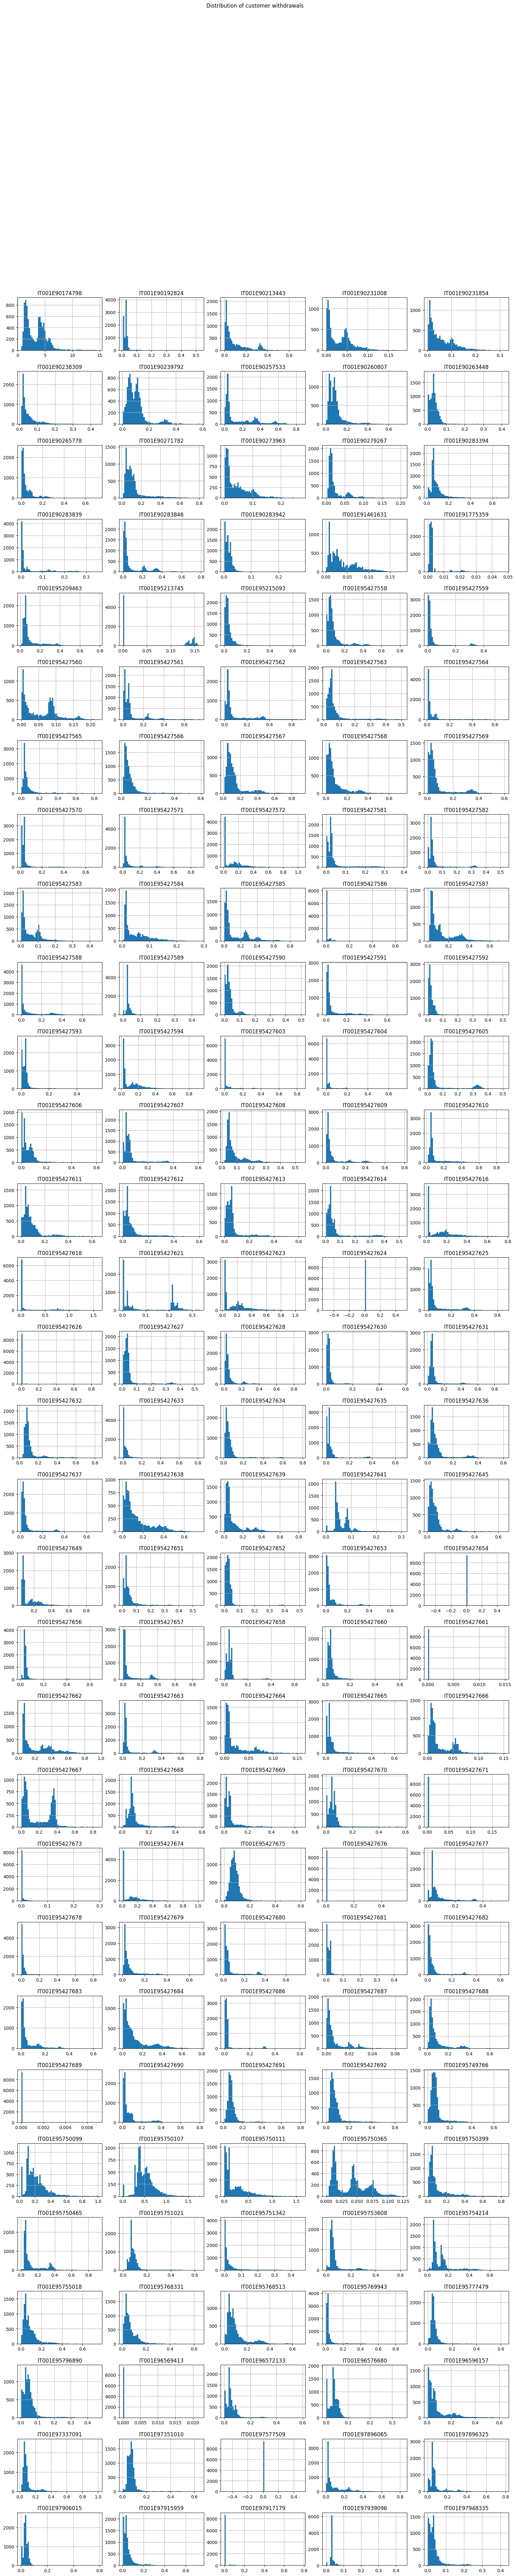

In [14]:
plot_costumers_distribution(withdrawals_df, 5, 60,'Distribution of customer withdrawals')


#### Input


In [15]:
customers_input_mask = (D_df_trimmed['TIPO'] != 0) & (D_df_trimmed['ID_OBIS'] == 147)
inputs_df = D_df_trimmed[customers_input_mask]
inputs_df.iloc[:, 3:].describe()


2018-06-13 00:00:00  2018-06-13 00:15:00  2018-06-13 00:30:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2018-06-13 00:45:00  2018-06-13 01:00:00  2018-06-13 01:15:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2018-06-13 01:30:00  2018-06-13 01:45:00  2018-06-13 02:00:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2018-06-13 02:15:00  ...  2018-09-18 21:30:00  2018-09-18 21:45:00  \
count                  0.0  ...                  0.0                  0.0   
mean                   NaN  ...                  NaN                  NaN   
std                    NaN  ...                  NaN                  NaN   
min                    NaN  ...                  NaN                  NaN   
25%                    NaN  ...                  NaN                  NaN   
50%                    NaN  ...                  NaN                  NaN   
75%                    NaN  ...                  NaN                  NaN   
max                    NaN  ...                  NaN                  NaN   

       2018-09-18 22:00:00  2018-09-18 22:15:00  2018-09-18 22:30:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2018-09-18 22:45:00  2018-09-18 23:00:00  2018-09-18 23:15:00  \
count                  0.0                  0.0                  0.0   
mean                   NaN                  NaN                  NaN   
std                    NaN                  NaN                  NaN   
min                    NaN                  NaN                  NaN   
25%                    NaN                  NaN                  NaN   
50%                    NaN                  NaN                  NaN   
75%                    NaN                  NaN                  NaN   
max                    NaN                  NaN                  NaN   

       2018-09-18 23:30:00  2018-09-18 23:45:00  
count             

In [58]:
plot_costumers_distribution(inputs_df, 5, 25,'Distribution of customer inputs')


ValueError: Number of rows must be a positive integer, not 0

<Figure size 640x480 with 0 Axes>

# Losses calculus

In [16]:
summary_df = compute_summary_df(D_df_trimmed)
summary_df


2018-06-13 00:00:00 2018-06-13 00:15:00  \
Consumi_CEBE                               20.34               19.38   
Risalite_CEBE                                0.0                 0.0   
Consumo_netto_CEBE                         20.34               19.38   
Consumi_Totali_clienti                 14.523044           13.842244   
Immissioni_Totali_clienti                    0.0                 0.0   
Consumo_totale_netto_clienti           14.523044           13.842244   
Perdite                                 5.816956            5.537756   
Perdite_percentuali                          NaN                 NaN   

                             2018-06-13 00:30:00 2018-06-13 00:45:00  \
Consumi_CEBE                               19.44               17.58   
Risalite_CEBE                                0.0                 0.0   
Consumo_netto_CEBE                         19.44               17.58   
Consumi_Totali_clienti                 13.913989           12.949511   
Immissioni_Totali_clienti                    0.0                 0.0   
Consumo_totale_netto_clienti           13.913989           12.949511   
Perdite                                 5.526011            4.630489   
Perdite_percentuali                          NaN                 NaN   

                             2018-06-13 01:00:00 2018-06-13 01:15:00  \
Consumi_CEBE                               16.68               16.98   
Risalite_CEBE                                0.0                 0.0   
Consumo_netto_CEBE                         16.68               16.98   
Consumi_Totali_clienti                 12.329156           12.276067   
Immissioni_Totali_clienti                    0.0                 0.0   
Consumo_totale_netto_clienti           12.329156           12.276067   
Perdite                                 4.350844            4.703933   
Perdite_percentuali                          NaN                 NaN   

                             2018-06-13 01:30:00 2018-06-13 01:45:00  \
Consumi_CEBE                               16.44               15.84   
Risalite_CEBE                                0.0                 0.0   
Consumo_netto_CEBE                         16.44               15.84   
Consumi_Totali_clienti                 11.589989           11.589322   
Immissioni_Totali_clienti                    0.0                 0.0   
Consumo_totale_netto_clienti           11.589989           11.589322   
Perdite                                 4.850011            4.250678   
Perdite_percentuali                          NaN                 NaN   

                             2018-06-13 02:00:00 2018-06-13 02:15:00  ...  \
Consumi_CEBE                               15.78               15.96  ...   
Risalite_CEBE                                0.0                 0.0  ...   
Consumo_netto_CEBE                         15.78               15.96  ...   
Consumi_Totali_clienti                 11.503011           12.028222  ...   
Immissioni_Totali_clienti                    0.0                 0.0  ...   
Consumo_totale_netto_clienti           11.503011           12.028222  ...   
Perdite                                 4.276989            3.931778  ...   
Perdite_percentuali                          NaN                 NaN  ...   

                             2018-09-18 21:30:00 2018-09-18 21:45:00  \
Consumi_CEBE                               28.26           27.743077   
Risalite_CEBE                                0.0                 0.0   
Consumo_netto_CEBE                         28.26           27.743077   
Consumi_Totali_clienti                 21.276478           20.903754   
Immissioni_Totali_clienti                    0.0                 0.0   
Consumo_totale_netto_clienti           21.276478           20.903754   
Perdite                                 6.983522            6.839323   
Perdite_percentuali                          NaN                 NaN   

                             2018-09-18 22:00:00 2018-09-18 22:15:00  \
Consumi_CEBE      

## Summary plot

In [17]:
plot_the_curve(summary_df, 'General Overview', 'Time', 'Kwh')


# Metrics calculus

## Some Theory

### 1 The Pearson correlation coefficient
It is a measure of the linear correlation between two variables. It's a value between -1 and 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
The Pearson correlation coefficient measures the degree to which the two variables vary together, and it assumes that the relationship between the variables is linear.
It can be used to determine whether there is a statistically significant relationship between two variables.
It's worth noting that the Pearson correlation coefficient only measures the linear relationship between two variables, and it's not suitable for detecting nonlinear relationships.
In addition, the coefficient can be influenced by outliers or extreme values in the data, so it's important to examine the data carefully before interpreting the results of a correlation analysis.


$$Pearson_{X,Y} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

where $n$ is the number of observations in the dataset, $\bar{x}$ and $\bar{y}$ are the means of $X$ and $Y$, respectively, and $x_i$ and $y_i$ are the $i$th observations of $X$ and $Y$, respectively.
### 2 P-value
It is a measure of the evidence against a null hypothesis. The null hypothesis is typically a statement that there is no difference or no association between two or more groups or variables. The p-value is a probability that measures the likelihood of observing a sample statistic as extreme or more extreme than the one observed, assuming the null hypothesis is true.



### 3 Spearman correlation
It is a non-parametric measure of correlation that is based on the rank order of the data rather than the actual values. It ranges from -1 to 1, with the same interpretation as Pearson correlation. Spearman correlation is useful when the relationship between the variables is non-linear or the data is not normally distributed.
If the Spearman correlation value were closer to 0, it would indicate that there is little or no correlation between the two time series. A value close to 1 would indicate a strong positive correlation, while a value close to -1 would indicate a strong negative correlation.

$$ Spearman = 1 - \frac{6\sum d_i^2}{n(n^2-1)} $$
where $d_i$ is the difference between the ranks of the $i$th observation in the two variables, $n$ is the sample size, and $r_s$ is the Spearman correlation coefficient.



### 3 Kendall correlation
This is another non-parametric measure of correlation that is based on the rank order of the data. It ranges from -1 to 1, with the same interpretation as Pearson and Spearman correlation. Kendall correlation is particularly useful for detecting relationships between variables that involve ties or are not strictly monotonic.

$$ Kendall = \frac{2}{n(n-1)} \sum_{i<j} \operatorname{sgn}(x_i - x_j) \operatorname{sgn}(y_i - y_j) $$
where $\operatorname{sgn}(x)$ is the sign of $x$, $n$ is the sample size, and $\tau$ is the Kendall correlation coefficient.



### 4 Cross-correlation
It measures the degree of similarity between two time series as a function of the time lag applied to one of them. Cross-correlation is useful for identifying the time lag between two variables that maximizes their correlation.
It's important to note that when considering cross-correlation without lag, you are essentially calculating the Pearson correlation coefficient between the two time series.
The magnitude of the value indicates how strongly the two time series are related.
If the cross-correlation between two time series is negative, it indicates an inverse relationship between the two time series.

$$ Cross-correlation_{XY}(k) = \frac{1}{n} \sum_{t=1}^{n-k} (X_t - \bar{X})(Y_{t+k} - \bar{Y}) $$
where $X_t$ and $Y_t$ are the values of the two time series at time $t$, $k$ is the time lag, $n$ is the sample size, and $\bar{X}$ and $\bar{Y}$ are the mean values of the two time series.



### 5 Coherence
It is a measure of the degree of linear association between two time series as a function of frequency. Coherence is used in frequency domain analysis to quantify the degree to which the amplitude and phase of one time series predicts the amplitude and phase of the other time series at different frequencies.

$$ C_{XY}(\omega) = \frac{|G_{XY}(\omega)|^2}{G_{XX}(\omega)G_{YY}(\omega)} $$
where $G_{XY}(\omega)$, $G_{XX}(\omega)$, and $G_{YY}(\omega)$ are the cross-spectral density, the autospectral density of $X$, and the autospectral density of $Y$, respectively, at frequency $\omega$.



### 6 Mutual information
It is a measure of the amount of information that two random variables share, or the degree of dependence between them. In the context of time series analysis, mutual information can be used to detect nonlinear dependencies between two time series that may not be captured by linear correlation.Mutual information is a non-negative quantity that is symmetric with respect to the two variables, and is equal to zero if and only if the two variables are independent.

$$I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p(x,y) \log\left(\frac{p(x,y)}{p(x) p(y)}\right)$$



### 7 Kullback-Leibler
The Kullback-Leible divergence is a measure of the difference between two probability distributions, and it is not typically used to directly measure the similarity of two time series. However, it can be used indirectly to compare the distributions of two time series.
The KL divergence between two probability distributions $P$ and $Q$ over the same random variable $X$ is defined as:

$$KL(P|Q) = \sum_{x \in X} P(x) \log\frac{P(x)}{Q(x)}$$



### 8 Cosine distance
 It is a dissimilarity metric that measures the angle between two non-zero vectors in a high-dimensional space. Given two vectors, it calculates 1 minus the cosine of the angle between them. It ranges between 0 and 2, where 0 indicates that the vectors are identical, 1 indicates that the vectors are orthogonal, and 2 indicates that the vectors are diametrically opposed.
 In the context of time series data, each time series can be seen as a vector of values, where each value represents the value of the time series at a particular time point. The cosine distance between two time series is therefore a measure of their similarity or dissimilarity based on the angle between their corresponding vectors.

$$\text{cosine\_distance}(\mathbf{u}, \mathbf{v}) = 1 - \frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\| \|\mathbf{v}\|}$$

### Chebyshev polynomials


In [18]:
metrics_to_compute = {'PEARSON': pearson, 'P_VALUE': p_value, 'SPEARMAN': spearman, 'KENDAL': kendall,
                      'CROSS_CORRELATION': cross_correlation,
                      'MUTUAL_INFORMATION': mutual_info, 'COSINE_DISTANCE': cosine_distance, #'COHERENCE': compute_coherence_score,
                      }


l = summary_df.loc['Perdite']

metrics_df = compute_metrics(D_df_trimmed, l, metrics_to_compute)
metrics_df


  0%|          | 0/7 [00:00<?, ?it/s]C:\Users\A407620\PycharmProjects\Cabine_3.0\venv\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

 14%|█▍        | 1/7 [00:00<00:02,  2.96it/s]C:\Users\A407620\PycharmProjects\Cabine_3.0\venv\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

 29%|██▊       | 2/7 [00:00<00:01,  3.33it/s]C:\Users\A407620\PycharmProjects\Cabine_3.0\venv\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

 57%|█████▋    | 4/7 [00:12<00:10,  3.57s/it]C:\Users\A407620\PycharmProjects\Cabine_3.0\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and unknown values for target

C:\Use

PEARSON        P_VALUE  SPEARMAN    KENDAL  \
POD                                                           
IT001E90174798  0.025620   1.295305e-02  0.025444  0.018310   
IT001E90192824  0.235871  4.215678e-119  0.180855  0.124945   
IT001E90213443  0.138953   8.877142e-42  0.215811  0.143514   
IT001E90231008  0.226447  1.104069e-109  0.166258  0.112842   
IT001E90231854  0.454709   0.000000e+00  0.467464  0.324654   
...                  ...            ...       ...       ...   
IT001E97906015  0.172679   7.035814e-64  0.267402  0.183643   
IT001E97915959  0.255273  7.515284e-140  0.335193  0.228331   
IT001E97917179  0.043469   2.467847e-05  0.054947  0.043904   
IT001E97939096 -0.170732   1.814910e-62 -0.080085 -0.055698   
IT001E97948335  0.227384  1.335537e-110  0.134979  0.092815   

                CROSS_CORRELATION  MUTUAL_INFORMATION  COSINE_DISTANCE  
POD                                                                     
IT001E90174798      181225.171429            6.350108         0.180857  
IT001E90192824        1542.266684            3.581296         0.199411  
IT001E90213443        5357.679294            6.043618         0.338575  
IT001E90231008        1834.562999            4.379924         0.246024  
IT001E90231854        3387.203663            4.998241         0.192765  
...                           ...                 ...              ...  
IT001E97906015        2272.712494            4.181703         0.293952  
IT001E97915959        3068.253593            4.723367         0.326457  
IT001E97917179         657.290471            0.860443         0.782150  
IT001E97939096        1849.335453            3.372921         0.237271  
IT001E97948335        2150.266987            4.523178         0.317311  

[155 rows x 7 columns]

In [63]:
for col in metrics_df.columns:
    sorted_index = np.argsort(-metrics_df[col].values)
    rank_name = col + '_RANK'
    metrics_df[rank_name] = metrics_df[col].rank(ascending=False, method='dense')

metrics_df


PEARSON        P_VALUE  SPEARMAN    KENDAL  \
POD                                                           
IT001E90174798  0.025620   1.295305e-02  0.025444  0.018310   
IT001E90192824  0.235871  4.215678e-119  0.180855  0.124945   
IT001E90213443  0.138953   8.877142e-42  0.215811  0.143514   
IT001E90231008  0.226447  1.104069e-109  0.166258  0.112842   
IT001E90231854  0.454709   0.000000e+00  0.467464  0.324654   
...                  ...            ...       ...       ...   
IT001E97906015  0.172679   7.035814e-64  0.267402  0.183643   
IT001E97915959  0.255273  7.515284e-140  0.335193  0.228331   
IT001E97917179  0.043469   2.467847e-05  0.054947  0.043904   
IT001E97939096 -0.170732   1.814910e-62 -0.080085 -0.055698   
IT001E97948335  0.227384  1.335537e-110  0.134979  0.092815   

                CROSS_CORRELATION  MUTUAL_INFORMATION  COSINE_DISTANCE  \
POD                                                                      
IT001E90174798      181225.171429            6.350108         0.180857   
IT001E90192824        1542.266684            3.581296         0.199411   
IT001E90213443        5357.679294            6.043618         0.338575   
IT001E90231008        1834.562999            4.379924         0.246024   
IT001E90231854        3387.203663            4.998241         0.192765   
...                           ...                 ...              ...   
IT001E97906015        2272.712494            4.181703         0.293952   
IT001E97915959        3068.253593            4.723367         0.326457   
IT001E97917179         657.290471            0.860443         0.782150   
IT001E97939096        1849.335453            3.372921         0.237271   
IT001E97948335        2150.266987            4.523178         0.317311   

                PEARSON_RANK  P_VALUE_RANK  SPEARMAN_RANK  KENDAL_RANK  \
POD                                                                      
IT001E90174798         135.0          11.0          136.0        136.0   
IT001E90192824          46.0         106.0           86.0         84.0   
IT001E90213443          97.0          53.0           77.0         77.0   
IT001E90231008          56.0          96.0           99.0         99.0   
IT001E90231854           4.0         145.0            7.0          7.0   
...                      ...           ...            ...          ...   
IT001E97906015          82.0          69.0           59.0         58.0   
IT001E97915959          37.0         116.0           38.0         38.0   
IT001E97917179         129.0          17.0          127.0        124.0   
IT001E97939096         150.0          68.0          148.0        148.0   
IT001E97948335          55.0          97.0          105.0        104.0   

                CROSS_CORRELATION_RANK  MUTUAL_INFORMATION_RANK  \
POD                                                               
IT001E90174798                     1.0                      3.0   
IT001E90192824                   132.0                    135.0   
IT001E90213443                    32.0                      6.0   
IT001E90231008                   125.0                    110.0   
IT001E90231854                    82.0                     50.0   
...                                ...                      ...   
IT001E97906015                   114.0                    114.0   
IT001E97915959                    92.0                     79.0   
IT001E97917179                   142.0                    147.0   
IT001E97939096                   124.0                    136.0   
IT001E97948335                   117.0                     99.0   

                COSINE_DISTANCE_RANK  
POD                                   
IT001E90174798                 145.0  
IT001E90192824                 138.0  
IT001E90213443                  68.0  
IT001E90231008                 114.0  
IT001E90231854                 141.0  
...                              ...  
IT001E97906015                  94.0  
IT001E97915959                  72.0  
IT001E979

# Let's save the results

In [61]:
#output_file_name file_target[:-4] + '_rank.csv'
#output_file_path = os.path.join(output_dir, output_file_name)
#metrics_df.to_csv(output_file_path)


# TEST KDE

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde


# set parameters for the Gaussian distributions
mean1 = 250
std1 = 50
mean2 = 3
std2 = 7

# generate two sets of random numbers from independent Gaussian distributions
n_samples = 1000
set1 = np.random.normal(mean1, std1, n_samples)
set2 = np.random.normal(mean2, std2, n_samples)

# add the two sets of random numbers to obtain a new set representing the sum of the Gaussian distributions
sum_set = np.add(set1, set2)

# construct a time index for the time series
start_date = '2022-01-01'
freq = 'D' # daily frequency
time_index = pd.date_range(start_date, periods=n_samples, freq=freq)

# create the time series using the sum of the Gaussian distributions as the data and the time index as the index
ts = pd.Series(sum_set, index=time_index)

ts_no_nan = ts.dropna() # remove NaN values
kde = gaussian_kde(ts_no_nan)

print(kde)
pdf_values =  kde.evaluate(range(n_samples))
plt.plot(range(n_samples),pdf_values)

Test decomposition

In [66]:
from scipy.stats import gaussian_kde


tmp = D_df_trimmed[D_df_trimmed['TIPO'] != 0]
tmp = tmp.set_index('POD').iloc[:,2:]

kde_dict = {}
for idx, row in tmp.iterrows():
    kde_dict[idx] = gaussian_kde(row)

kde_dict                                         #pod to test 'IT001E00624204'
perdite_kde = gaussian_kde(summary_df.loc['Perdite'])

print(entropy( kde_dict['IT001E95427664'], perdite_kde))


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.